# Prediction for survivor of Titanic

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import time

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFECV
#from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split, ShuffleSplit,cross_validate, StratifiedKFold

from sklearn.cross_validation import cross_val_score, train_test_split, ShuffleSplit

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#from xgboost import XGBClassifier

#from keras.layers import Dense
#from keras.models import Sequential
#from keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adam, SGD, Adamax

import h5py


In [151]:
train_df = pd.read_csv('C:/Users/u35584/Downloads/Python/Ex_Files_NumPy_Data_EssT/Exercise Files/Ch 4/04_04/Starting/train.csv')
test_df = pd.read_csv('C:/Users/u35584/Downloads/Python/Ex_Files_NumPy_Data_EssT/Exercise Files/Ch 4/04_04/Starting/test.csv')


In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [153]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [154]:
test_id = test_df['PassengerId']
test_id

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, dtype: int64

In [155]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [156]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [157]:
dataset = pd.concat(objs=[train_df,test_df],axis=0).reset_index(drop=True)
#dataset = pd.concat(objs=[train_df,test_df],axis=0) # reset index is important here
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [158]:
## replacing all null values with NaN.
dataset.fillna(np.nan)
#dataset.fillna(0) # this will replace nulls with 0 which we dont want to do here..

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [159]:
dataset.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [160]:
survived = dataset[dataset['Survived']==1]
nonsur = dataset[dataset['Survived'] == 0]

In [161]:
#survived.Sex.value_counts()
survived.Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

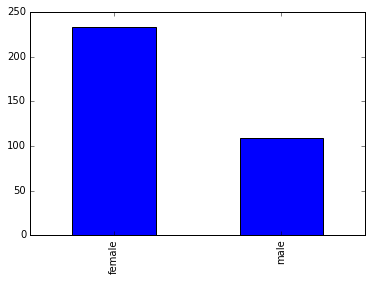

In [162]:
survived.Sex.value_counts().plot(kind='bar');

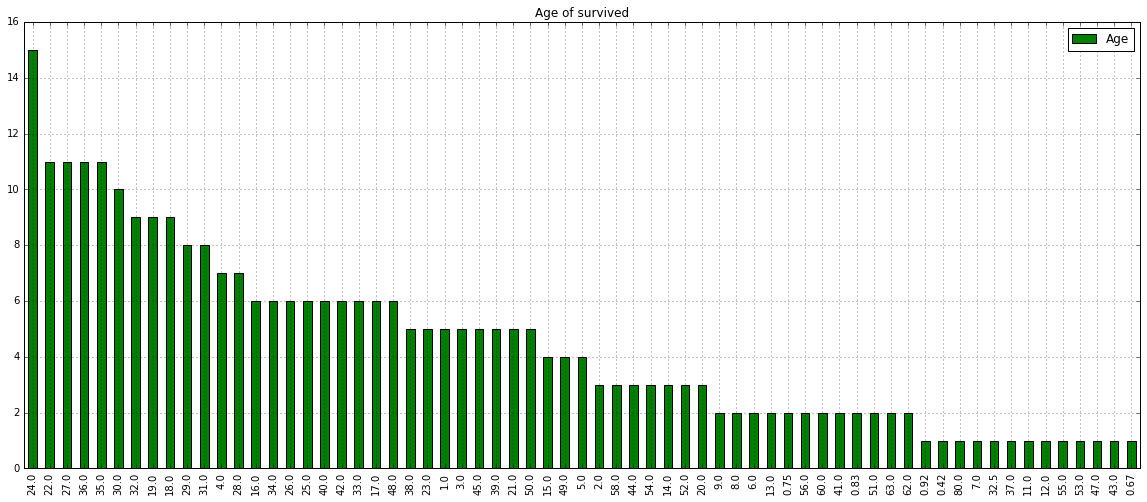

In [163]:
survived.Age.value_counts().plot(kind='bar', color='g', title = "Age of survived", grid = True, legend = True, figsize=(20,8));

In [164]:
#Create new Title column in the data frame.
#split at comma, then for [1] - split at '.' and then strip(remove additional spaces) it.

dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]

# create a title column in dataset.
dataset["Title"] = pd.Series(dataset_title)

In [165]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs


In [166]:
dataset["Title"].value_counts() # what all titles available.

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Dona              1
Sir               1
Capt              1
Don               1
Mme               1
the Countess      1
Lady              1
Name: Title, dtype: int64

In [167]:
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [168]:
dataset["Title"].value_counts() # what all titles available now.

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [169]:
dataset.groupby('Title')['Age'].describe()

Title        
Master  count     53.000000
        mean       5.482642
        std        4.161554
        min        0.330000
        25%             NaN
        50%             NaN
        75%             NaN
        max       14.500000
Miss    count    213.000000
        mean      21.824366
        std       12.171431
        min        0.170000
        25%             NaN
        50%             NaN
        75%             NaN
        max       63.000000
Mr      count    581.000000
        mean      32.252151
        std       12.422089
        min       11.000000
        25%             NaN
        50%             NaN
        75%             NaN
        max       80.000000
Mrs     count    171.000000
        mean      36.918129
        std       12.902087
        min       14.000000
        25%             NaN
        50%             NaN
        75%             NaN
        max       76.000000
Rare    count     28.000000
        mean      45.178571
        std       11.105733
      

In [170]:
# Mapping values for title and replacing age missing values

dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Mrs":2, "Mr":3, "Rare":4})
dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==0), 'Age']=6
dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==1), 'Age']=22
dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==2), 'Age']=37
dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==3), 'Age']=33
dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==4), 'Age']=46

In [171]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,3
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,3
5,33.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,3
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,3
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2


In [172]:
dataset.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [173]:
print(dataset[dataset['Embarked'].isnull()])

      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  Title  
61       0           62       1  female      0       1.0  113572      1  
829      0          830       1  female      0       1.0  113572      2  


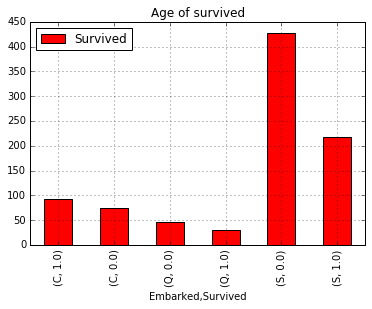

In [174]:
#e = dataset.Embarked.value_counts() - change "Survived to correct column u want"
dataset.groupby('Embarked').Survived.value_counts().plot(kind='bar', color='r', title = "Age of survived", grid = True, legend = True);

In [175]:
## fill 'S' as it is most frequent value for Embarked

dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [176]:
print(dataset[dataset['Embarked'].isnull()])

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Survived, Ticket, Title]
Index: []


In [177]:
print(dataset[dataset['Fare'].isnull()])

       Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket  Title  
1043       3  male      0       NaN   3701      3  


In [178]:
## fill null in fare with the mean fare for pclass 3

dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'][dataset['Pclass']==3].mean())

In [179]:
dataset.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [180]:
## create a new column named 'age category' based on age

dataset['Age_cat']=0
dataset.loc[dataset['Age']<=15,'Age_cat']=0
dataset.loc[(dataset['Age']>15)&(dataset['Age']<=30),'Age_cat']=1
dataset.loc[(dataset['Age']>30)&(dataset['Age']<=45),'Age_cat']=2
dataset.loc[(dataset['Age']>45)&(dataset['Age']<=60),'Age_cat']=3
dataset.loc[dataset['Age']>60,'Age_cat']=4

## We created age category for efficiency

In [181]:
## create a new coumn family size to reduce complications

dataset["Familysize"] = dataset["SibSp"] + dataset["Parch"] 

In [182]:
dataset["Familysize"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Familysize, dtype: int64

In [183]:
## create 4 categories based on family size and then describe 'Survived' series in the dataset.

dataset['Familysize_cat'] = pd.cut(dataset['Familysize'], 4)
dataset.groupby(dataset['Familysize_cat'])['Survived'].describe()

Familysize_cat       
(-0.01, 2.5]    count    800.000000
                mean       0.388750
                std        0.487771
                min        0.000000
                25%             NaN
                50%             NaN
                75%             NaN
                max        1.000000
(2.5, 5]        count     66.000000
                mean       0.409091
                std        0.495434
                min        0.000000
                25%             NaN
                50%             NaN
                75%             NaN
                max        1.000000
(5, 7.5]        count     18.000000
                mean       0.222222
                std        0.427793
                min        0.000000
                25%             NaN
                50%             NaN
                75%             NaN
                max        1.000000
(7.5, 10]       count      7.000000
                mean       0.000000
                std        0.000000
      

In [184]:
dataset
### if u see, below the category is created as (-0.01,2.5) - difficult to use it

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Age_cat,Familysize,Familysize_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,3,1,1,"(-0.01, 2.5]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,2,1,"(-0.01, 2.5]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,1,0,"(-0.01, 2.5]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,2,1,"(-0.01, 2.5]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,3,2,0,"(-0.01, 2.5]"
5,33.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,3,2,0,"(-0.01, 2.5]"
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,3,3,0,"(-0.01, 2.5]"
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0,0,4,"(2.5, 5]"
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,1,2,"(-0.01, 2.5]"
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2,0,1,"(-0.01, 2.5]"


In [185]:
## change the familysize category to integer value

#Remember - here we could have directly created this and last 2 in boxes were useless

dataset['Familysize_cat'] = 0
dataset.loc[(dataset['Familysize'] > 0.1) & (dataset['Familysize'] <= 2.5), 'Familysize_cat']  = 0
dataset.loc[(dataset['Familysize'] > 2.5) & (dataset['Familysize'] <= 5.0), 'Familysize_cat'] = 1
dataset.loc[(dataset['Familysize'] > 5.0) & (dataset['Familysize'] <= 7.5), 'Familysize_cat']   = 2
dataset.loc[ dataset['Familysize'] > 7.5, 'Familysize_cat']  = 3
dataset['Familysize_cat'] = dataset['Familysize_cat'].astype(int)

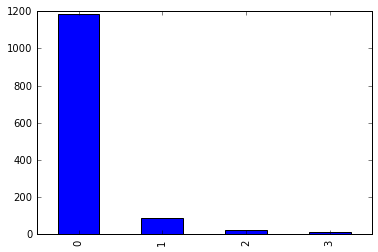

In [186]:
dataset['Familysize_cat'].value_counts().plot(kind='bar');

In [187]:
## create new column - IsAlone = 1 if family size is 0 - alone, else it is 0, means 'not alone'
dataset['IsAlone'] = np.where(dataset['Familysize'] ==0 ,1,0)

### WE DID ABOVE BCOZ THE PROBABILITY IS MORE FOR ALONE SURVIVORS

In [188]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Age_cat,Familysize,Familysize_cat,IsAlone
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,3,1,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,2,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,1,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,2,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,3,2,0,0,1
5,33.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,3,2,0,0,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,3,3,0,0,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0,0,4,1,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,1,2,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,2,0,1,0,0


In [189]:
dataset['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
7.2250     21
7.8542     21
8.6625     21
7.2500     18
0.0000     17
21.0000    14
16.1000    12
9.5000     12
69.5500    11
14.5000    11
27.7208    11
7.8792     10
7.7958     10
14.4542    10
15.5000    10
24.1500     9
7.0500      9
15.2458     9
46.9000     8
52.0000     8
           ..
12.5250     1
6.8583      1
15.5792     1
6.4500      1
31.6833     1
35.0000     1
7.7792      1
9.8375      1
34.0208     1
28.5375     1
7.8208      1
6.2375      1
7.8000      1
7.1417      1
15.0000     1
7.7875      1
42.5000     1
8.4333      1
7.8750      1
8.0292      1
25.7417     1
7.0458      1
31.6792     1
9.6875      1
7.7292      1
7.8500      1
27.4458     1
10.1708     1
49.5000     1
10.5167     1
Name: Fare, dtype: int64

In [190]:
### create a new column Rate_rating

dataset['Fare_R'] = pd.qcut(dataset['Fare'],4)
dataset.groupby(dataset['Fare_R'])['Survived'].describe()

Fare_R                  
[0, 7.896]         count    223.000000
                   mean       0.197309
                   std        0.398863
                   min        0.000000
                   25%             NaN
                   50%             NaN
                   75%             NaN
                   max        1.000000
(7.896, 14.454]    count    224.000000
                   mean       0.303571
                   std        0.460830
                   min        0.000000
                   25%             NaN
                   50%             NaN
                   75%             NaN
                   max        1.000000
(14.454, 31.275]   count    229.000000
                   mean       0.441048
                   std        0.497600
                   min        0.000000
                   25%             NaN
                   50%             NaN
                   75%             NaN
                   max        1.000000
(31.275, 512.329]  count    215.000000


In [191]:
## Create a new column fare category

dataset['Fare_cat'] = 0
dataset.loc[(dataset['Fare'] <= 7.896), 'Fare_cat']  = 0
dataset.loc[(dataset['Fare'] > 7.896) & (dataset['Fare'] <= 14.454), 'Fare_cat'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.275), 'Fare_cat']   = 2
dataset.loc[ dataset['Fare'] > 31.275, 'Fare_cat']  = 3
dataset['Fare_cat'] = dataset['Fare_cat'].astype(int)

In [192]:
## one more new column
## group by ticket and check if more than 1 ticket for a name.

dataset['Shared_ticket'] = np.where(dataset.groupby('Ticket')['Name'].transform('count') > 1, 1, 0)


In [193]:
## create new column 
dataset['Cabin_known'] = dataset['Cabin'].isnull()==False

# when null in 'Cabin' then True == False is False. So, False will be assigned to 'Cabin_known'..

In [194]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

In [195]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Age_cat,Familysize,Familysize_cat,IsAlone,Fare_R,Fare_cat,Shared_ticket,Cabin_known
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,A/5 21171,3,1,1,0,0,"[0, 7.896]",0,0,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,PC 17599,2,2,1,0,0,"(31.275, 512.329]",3,1,True
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,STON/O2. 3101282,1,1,0,0,1,"(7.896, 14.454]",1,0,False
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,113803,2,2,1,0,0,"(31.275, 512.329]",3,1,True
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,373450,3,2,0,0,1,"(7.896, 14.454]",1,0,False
5,33.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,0,0,...,330877,3,2,0,0,1,"(7.896, 14.454]",1,0,False
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,...,17463,3,3,0,0,1,"(31.275, 512.329]",3,1,True
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,...,349909,0,0,4,1,0,"(14.454, 31.275]",2,1,False
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,...,347742,2,1,2,0,0,"(7.896, 14.454]",1,1,False
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,...,237736,2,0,1,0,0,"(14.454, 31.275]",2,1,False


In [197]:
dataset = pd.get_dummies(dataset, columns = ['Title'])
dataset = pd.get_dummies(dataset, columns = ['Embarked'],prefix='Em')

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
Age               1309 non-null float64
Cabin             295 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null int64
SibSp             1309 non-null int64
Survived          891 non-null float64
Ticket            1309 non-null object
Age_cat           1309 non-null int64
Familysize        1309 non-null int64
Familysize_cat    1309 non-null int32
IsAlone           1309 non-null int32
Fare_R            1309 non-null category
Fare_cat          1309 non-null int32
Shared_ticket     1309 non-null int32
Cabin_known       1309 non-null bool
Title_0           1309 non-null float64
Title_1           1309 non-null float64
Title_2           1309 non-null float64
Title_3           1309 non-null float64
Ti

In [206]:
dataset

,Pclass,Sex,Survived,Age_cat,Familysize_cat,IsAlone,Fare_cat,Shared_ticket,Cabin_known,Title_0,Title_1,Title_2,Title_3,Title_4,Em_C,Em_Q,Em_S
0,3,0,0.0,1,0,0,0,0,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,1.0,2,0,0,3,1,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1.0,1,0,1,1,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,1.0,2,0,0,3,1,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,0,0.0,2,0,1,1,0,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3,0,0.0,2,0,1,1,0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1,0,0.0,3,0,1,3,1,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,3,0,0.0,0,1,0,2,1,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,3,1,1.0,1,0,0,1,1,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,2,1,1.0,0,0,0,2,1,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [207]:
## drop the columns which are not needed
drop_element =['Fare_R','Age','Fare','Cabin', 'PassengerId', 'Familysize', 'Parch', 'SibSp','Ticket','Name']
dataset = dataset.drop(drop_element, axis=1)

ValueError: labels ['Fare_R' 'Age' 'Fare' 'Cabin' 'PassengerId' 'Familysize' 'Parch' 'SibSp'
 'Ticket' 'Name'] not contained in axis

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Pclass            1309 non-null int64
Sex               1309 non-null int64
Survived          891 non-null float64
Age_cat           1309 non-null int64
Familysize_cat    1309 non-null int32
IsAlone           1309 non-null int32
Fare_cat          1309 non-null int32
Shared_ticket     1309 non-null int32
Cabin_known       1309 non-null bool
Title_0           1309 non-null float64
Title_1           1309 non-null float64
Title_2           1309 non-null float64
Title_3           1309 non-null float64
Title_4           1309 non-null float64
Em_C              1309 non-null float64
Em_Q              1309 non-null float64
Em_S              1309 non-null float64
dtypes: bool(1), float64(9), int32(4), int64(3)
memory usage: 144.5 KB


In [203]:
dataset.sample()

,Pclass,Sex,Survived,Age_cat,Familysize_cat,IsAlone,Fare_cat,Shared_ticket,Cabin_known,Title_0,Title_1,Title_2,Title_3,Title_4,Em_C,Em_Q,Em_S
774,2,1,1.0,3,1,0,2,1,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [209]:
## Again splitting the combined dataset

train_len = len(train_df)
train = dataset[:train_len]
test = dataset[train_len:]
test.drop('Survived', axis=1, inplace=True)

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null float64
Age_cat           891 non-null int64
Familysize_cat    891 non-null int32
IsAlone           891 non-null int32
Fare_cat          891 non-null int32
Shared_ticket     891 non-null int32
Cabin_known       891 non-null bool
Title_0           891 non-null float64
Title_1           891 non-null float64
Title_2           891 non-null float64
Title_3           891 non-null float64
Title_4           891 non-null float64
Em_C              891 non-null float64
Em_Q              891 non-null float64
Em_S              891 non-null float64
dtypes: bool(1), float64(9), int32(4), int64(3)
memory usage: 98.4 KB


In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 16 columns):
Pclass            418 non-null int64
Sex               418 non-null int64
Age_cat           418 non-null int64
Familysize_cat    418 non-null int32
IsAlone           418 non-null int32
Fare_cat          418 non-null int32
Shared_ticket     418 non-null int32
Cabin_known       418 non-null bool
Title_0           418 non-null float64
Title_1           418 non-null float64
Title_2           418 non-null float64
Title_3           418 non-null float64
Title_4           418 non-null float64
Em_C              418 non-null float64
Em_Q              418 non-null float64
Em_S              418 non-null float64
dtypes: bool(1), float64(8), int32(4), int64(3)
memory usage: 42.9 KB


In [212]:
train["Survived"] = train["Survived"].astype(int)
train_y = train["Survived"]
train_x = train.drop("Survived",axis = 1)

In [213]:
filepath="weights.best.hdf5"

In [215]:
model = DecisionTreeClassifier(random_state=42)

In [224]:
model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [225]:
from sklearn.metrics import confusion_matrix, metrics

In [231]:
predictions = model.predict(test)

In [236]:
## PREDICT AND WRITE TO THE CSV file

pred = np.round(predictions)
pred = pred.flatten()
Submission = pd.DataFrame({ 'PassengerId': test_id ,
                            'Survived': pred.astype(int)})
Submission.to_csv("Submission.csv", index=False)

Submission.sample()


,PassengerId,Survived
262,1154,1
